 # EDA for Lending Club Data 

                                                                          Deployed By Vikas Garg and Chacko Mulackel

### Description 

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
•	If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
•	If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### About Data: 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Objective: 

When a person applies for a loan, there are two types of decisions that could be taken by the company:
1.	Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
o	Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
o	Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
o	Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2.	Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

This notebook finds consumer attributes and loan attributes influence the tendency of default.

`The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.` 


# 1. Data Sourcing

In [1]:
#Import required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings('ignore')
from IPython.core.pylabtools import figsize

In [2]:
# Defining Source Path

loan = "/mnt/c/Users/Jaimy/Documents/Data/Dataset/loan/loan.csv"

In [ ]:
# Checking encoding of loan dataset

import chardet

with open(loan, 'rb') as f:
    result = chardet.detect(f.readline())

print(result)

In [3]:
#df=pd.read_csv('loan.csv',engine='python')
df =pd.read_csv(loan, engine = 'python')

In [4]:
df.shape

(39717, 111)

###### The original data set contain 39717 observations and 111 variables

In [5]:
df.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [6]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

# 2. Data Cleaning

##### Observations on Variables 

1) `term` is object, should be numeric.

2) `int_rate` is object , should be numeric 

3) `emp_title` has Nan values , instead of nan, 'Unknown' can be imputed if necessary

4) `emp_length` has to be standardized, there is greater than symbol and years mentioned , this should be converted to numeric 

5)`issue_d`, `earliest_cr_line` has to be converted to date field  

6) `revol_util` has to be standardized , % symbol has to be removed, datatype should be numeric

7)NaN-`next_pymnt_d`,`collections_12_mths_ex_med`,`mths_since_last_major_derog`,`annual_inc_joint`,`dti_joint`,
`verification_status_joint`,`tot_coll_amt`,`tot_cur_bal`,`open_acc_6m`,`open_il_6m`,`open_il_12m` etc 


All the records with more than 65% null/ nan will be removed

In [7]:
# id - A unique LC assigned ID for the loan listing.

len(df['id'].unique())


39717

#### All records are unique based on the primary key

In [8]:
df.count()

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


#### We can see there are a lot of variables with zero record count

In [9]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

In [10]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

There are 68 columns that have missing values.


,Missing Values,% of Total Values
bc_open_to_buy,39717,100.00
acc_open_past_24mths,39717,100.00
bc_util,39717,100.00
mo_sin_old_il_acct,39717,100.00
mo_sin_old_rev_tl_op,39717,100.00
mo_sin_rcnt_rev_tl_op,39717,100.00
mo_sin_rcnt_tl,39717,100.00
mort_acc,39717,100.00
mths_since_recent_bc,39717,100.00
mths_since_recent_bc_dlq,39717,100.00


In [12]:
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 60].index)
print('Remove %d columns.' % len(missing_columns))

There are 68 columns that have missing values.
Remove 57 columns.


In [13]:
missing_columns

['bc_open_to_buy',
 'acc_open_past_24mths',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'avg_cur_bal',
 'total_il_high_credit_limit',
 'inq_last_12m',
 'mths_since_rcnt_il',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'tot_cur_bal',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',

In [14]:
df = df.drop(columns = list(missing_columns))

In [15]:
df.replace('n/a', np.nan,inplace=True)

# Created new column term_month and converted object to integer
df['term_months'] = df['term'].str.extract('(\d+)').astype(int)

# Removing percentage sign and cconverting to float
df['int_rate']=list(map(lambda x: x[:-1], df['int_rate'].values))
df['int_rate'] = [float(x) for x in df['int_rate'].values]

# Converting NAN in emp_title to 'Unknown'
#df['emp_title'] = df.replace(np.NaN, 'Unknown', regex=True)

# Adding new column emp_length
# df.emp_length.fillna(value=0,inplace=True)
# df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
# df['emp_length'] = df['emp_length'].astype(int)

# Removing percentage sign and cconverting to float
df['revol_util'] = df['revol_util'].str.replace("%","").astype(float)

# Binning dti
df['dti_'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


In [16]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Lets remove years from all records and convert it into float.
* replace 10+ with 10 and <1 with 0 as per given instructions in data dictionary sheet. 

In [17]:
length={'10+ years' : 10,
        '2 years' : 2,
        '< 1 year':0,
        '3 years':3,
        '4 years':4,
        '5 years':5,
        '1 year':1, 
        '6 years':6,
        '7 years':7,
        '8 years':8,
        '9 years':9}

In [18]:
df.emp_length=df.emp_length.replace(length).astype(float)

In [19]:
df.emp_length.value_counts()

10.00    8879
0.00     4583
2.00     4388
3.00     4095
4.00     3436
5.00     3282
1.00     3240
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: emp_length, dtype: int64

In [20]:
#remove all missing value observations < 100
#Column--> last_pymnt_d,last_credit_pull_d,revol_util,title       
df=df.dropna(how='any',subset=['last_pymnt_d','last_credit_pull_d','revol_util','title'])

In [21]:
# Correcting all the date fields

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [22]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2016-05-01,2016-05-01


Fully Paid     32906
Charged Off     5541
Current         1140
Name: loan_status, dtype: int64

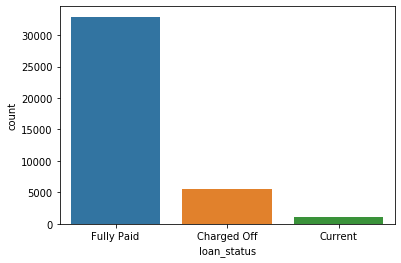

In [23]:
sns.countplot(df['loan_status'])
df['loan_status'].value_counts()

In [24]:
# Filtering data with only Fully Paid and Charged Off as current representing the loan still running

df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [25]:
#percentage of defaulter customers 
print("%.2f" % (df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df)))

14.41


In [26]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()


Fully Paid     32906
Charged Off     5541
Name: loan_status, dtype: int64

In [27]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
#df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
#df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

Fully Paid     32906
Charged Off     5541
Name: loan_status, dtype: int64

### There are 14.5 % loan defaulters

###  `'loan_status' will be the target variable `

In [28]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months
count,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,37423.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38447.00,38391.00,38447.00,38447.00,38391.00,38447.00,37751.00,38408.00,38447.00
mean,676619.72,842595.79,11060.43,10796.80,10237.36,11.92,322.82,4.94,68849.72,13.28,0.15,0.87,9.28,0.06,13319.14,48.70,22.08,0.00,0.00,11897.53,11301.03,9674.46,2124.57,1.37,97.12,12.66,2754.71,0.00,1.00,0.00,0.00,0.00,0.04,0.00,41.90
std,209262.71,264419.84,7346.94,7088.63,7022.76,3.69,208.61,3.56,64263.45,6.67,0.49,1.07,4.40,0.24,15878.18,28.36,11.42,0.00,0.00,8805.29,8697.06,7004.06,2390.79,7.33,695.87,150.59,4499.71,0.00,0.00,0.00,0.00,0.00,0.20,0.00,10.34
min,54734.00,70699.00,500.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,33.73,0.00,0.00,6.22,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,36.00
25%,512299.00,661398.50,5375.00,5200.00,5000.00,8.94,165.82,2.00,40000.00,8.14,0.00,0.00,6.00,0.00,3675.50,25.20,13.00,0.00,0.00,5537.42,5046.00,4500.00,647.15,0.00,0.00,0.00,218.97,0.00,1.00,0.00,0.00,0.00,0.00,0.00,36.00
50%,656937.00,839559.00,9700.00,9600.00,8758.61,11.71,278.25,4.00,59000.00,13.37,0.00,1.00,9.00,0.00,8788.00,49.10,20.00,0.00,0.00,9706.20,9098.16,8000.00,1304.18,0.00,0.00,0.00,572.32,0.00,1.00,0.00,0.00,0.00,0.00,0.00,36.00
75%,829340.00,1037577.50,15000.00,15000.00,14000.00,14.35,426.10,9.00,82000.00,18.56,0.00,1.00,12.00,0.00,16947.00,72.30,29.00,0.00,0.00,16158.72,15366.85,13200.00,2676.42,0.00,0.00,0.00,3463.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,36.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,0.00,0.00,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00,60.00


#### Column Analysis

`id` or `member_id` as it has no real predictive power since those are primary and unique key columns


In [29]:
# Dropping unwanted columns 

df=df.drop(['id','member_id'], axis = 1)

In [30]:
df.shape

(38447, 54)

In [31]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'term_months', 'dti_'],
      dtype='object')>

#### Lets remove below variables which are not usful in analysis
1- `'acc_now_delinq'` All records are 0.

2- `'application_type'` All records are 'Individual' thats why not good to keep.

3- `'chargeoff_within_12_mths'` All records are 0.

4- `'collections_12_mths_ex_med'`All records are 0.

5- `'delinq_amnt'`All records are 0.

6- `'desc'`No value in analysis as same and information in short is available in other columns

7- `'zip_code'`Only first three digits are visible so not useful.

8- `'url'`This variable is not useful here in EDA.

9- `'tax_liens'`All records are 0.

10-` 'initial_list_status'`All records are 'f' so need to remove.

11-` 'policy_code'`All records are 1.

12-` 'pymnt_plan'`All records are 'n'.

In [32]:
drop=['acc_now_delinq'
,'application_type'
,'chargeoff_within_12_mths'
,'collections_12_mths_ex_med'
,'delinq_amnt'
,'desc'
,'zip_code'
,'url'
,'tax_liens'
,'initial_list_status'
,'policy_code'
,'pymnt_plan']
df=df.drop(labels=drop,axis=1)

In [33]:
missing=100*df.isnull().sum()/len(df)
missing[missing>0]

emp_title              6.17
emp_length             2.66
pub_rec_bankruptcies   1.81
dti_                   0.44
dtype: float64

In [34]:
#Lets remove all observatins with missing value from all these variables
df=df.dropna(how='any',subset=['emp_title','emp_length','pub_rec_bankruptcies','dti_'])

In [35]:
#Lets check the uniques records for all variables.
df.nunique().sort_values()

out_prncp                      1
out_prncp_inv                  1
term_months                    2
term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
dti_                           6
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             508
loan_amnt                    847
funded_amnt                 1001
revol_util                  1081
total_rec_late_fee          1156
collection_recovery_fee     2378
dti                         2841
recoveries

In [36]:
#out_prncp and out_prncp_inv are having only one unique value. Lets check what is that.
df[['out_prncp','out_prncp_inv']].describe()

,out_prncp,out_prncp_inv
count,35227.00,35227.00
mean,0.00,0.00
std,0.00,0.00
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,0.00,0.00


In [37]:
#both variables have only 0 so can be removed.
df=df.drop(labels=['out_prncp','out_prncp_inv'],axis=1)

In [38]:
df.shape

(35227, 40)

# 3. EDA:Exploratory Data Analysis :

The purpose is to find anomalies, patterns, trends, or relationships. 

# Loan Amount Requested Versus the Funded Amount

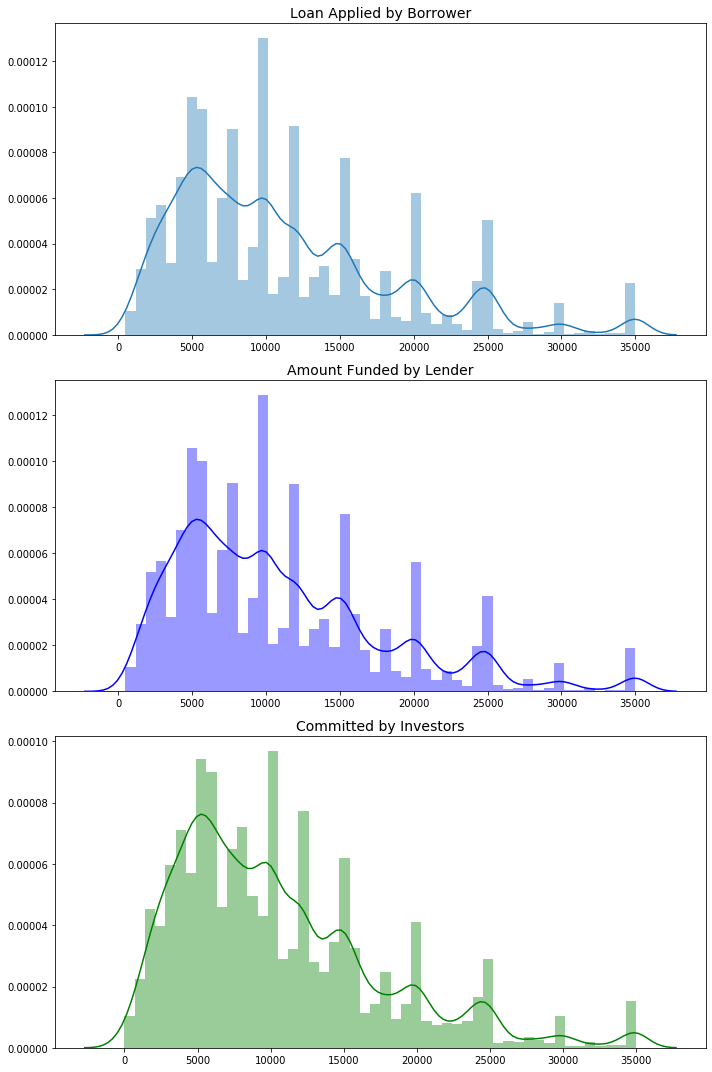

In [39]:
# Analysis of the loan applied , amount funded and Total commited 

figsize(sizex=10,sizey=15)
cols_review = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
fig, ax = plt.subplots(nrows=3)
sns.distplot(df["loan_amnt"].values, ax=ax[0])
ax[0].set_title("Loan Applied by Borrower", fontsize=14)
sns.distplot(df["funded_amnt"].values, ax=ax[1], color="blue")
ax[1].set_title("Amount Funded by Lender", fontsize=14)
sns.distplot(df["funded_amnt_inv"].values, ax=ax[2], color="green")
ax[2].set_title("Committed by Investors", fontsize=14)
plt.tight_layout()    
plt.show()

In [40]:
(df.loan_amnt != df.funded_amnt).value_counts()

False    33589
True      1638
dtype: int64

#### "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.” As per this comment we can see that the data can be manipulated hence we can ignore this comparison and  no insights can be derived

In [41]:
# Analysis on Interest Rates

df['int_rate'].describe()

count   35227.00
mean       11.99
std         3.70
min         5.42
25%         8.94
50%        11.86
75%        14.50
max        24.40
Name: int_rate, dtype: float64

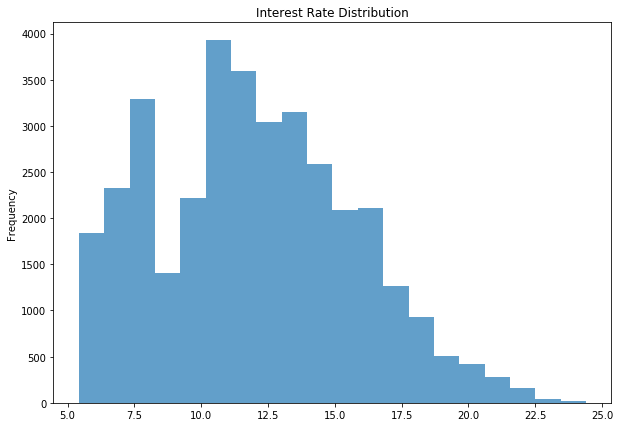

In [42]:
figsize(sizex=10,sizey=7)
np.unique(df['int_rate'].values), pd.Series(df['int_rate'].values).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution')
plt.show()

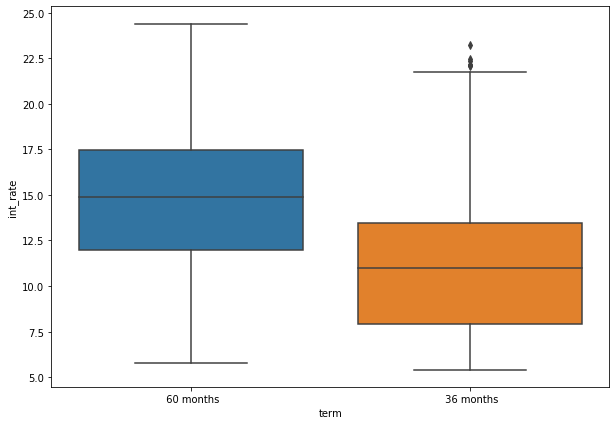

In [43]:
sns.boxplot(x=df.term,y=df.int_rate)
plt.show()

###  Bigger the loan, interset is high and longer period

#### Interest rates vary from 5.42% to 24.59 %

In [44]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term_months
count,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00,35227.00
mean,11146.79,10879.73,10440.38,11.99,324.42,4.98,69110.60,13.46,0.15,0.87,9.35,0.05,13418.53,49.33,22.24,12035.46,11559.68,9777.54,2160.73,1.30,95.88,12.06,2817.84,0.04,42.11
std,7330.48,7073.82,6972.01,3.70,207.30,3.54,63582.37,6.60,0.49,1.06,4.37,0.24,15688.14,28.12,11.40,8822.65,8676.68,7002.96,2412.94,7.08,693.36,143.25,4525.73,0.20,10.46
min,500.00,500.00,0.00,5.42,16.08,0.00,4000.00,0.01,0.00,0.00,2.00,0.00,0.00,0.00,2.00,33.73,0.00,0.00,6.22,0.00,0.00,0.00,0.01,0.00,36.00
25%,5500.00,5500.00,5000.00,8.94,168.09,2.00,41600.00,8.38,0.00,0.00,6.00,0.00,3832.00,26.20,14.00,5611.89,5333.58,4750.00,663.37,0.00,0.00,0.00,225.26,0.00,36.00
50%,10000.00,9600.00,9000.00,11.86,280.97,4.00,60000.00,13.54,0.00,1.00,9.00,0.00,8978.00,49.80,21.00,9881.47,9408.08,8000.00,1334.74,0.00,0.00,0.00,604.57,0.00,36.00
75%,15000.00,15000.00,14329.27,14.50,427.72,9.00,82500.00,18.67,0.00,1.00,12.00,0.00,17101.00,72.70,29.00,16325.81,15646.32,13500.00,2731.24,0.00,0.00,0.00,3613.28,0.00,60.00
max,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,2.00,60.00


In [45]:
# Converting issued date to years
ser = pd.to_datetime(df['issue_d'])
df['year'] = ser.dt.year

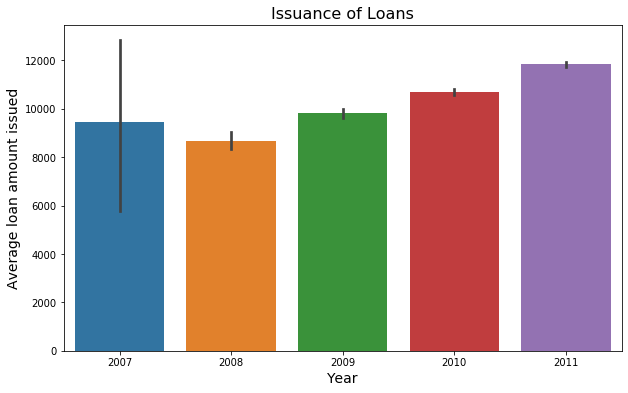

In [46]:
plt.figure(figsize=(10,6))
sns.barplot('year', 'loan_amnt', data=df)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)
plt.show()

#### The year of 2011 was the year were the highest amount of loans were issued 

# Purpose and Title 

In [47]:
print(df.purpose.value_counts())
print('')
print(df.title.value_counts().tail())

debt_consolidation    16891
credit_card            4620
other                  3437
home_improvement       2591
major_purchase         1951
car                    1383
small_business         1341
wedding                 860
medical                 622
moving                  519
vacation                331
house                   324
educational             272
renewable_energy         85
Name: purpose, dtype: int64

DebtLoan                      1
Andy Credit Card Refinance    1
fix car                       1
dineiro extra                 1
Cleaning Up                   1
Name: title, dtype: int64


    debt_consolidation    18012
    credit_card            5021
    other                  3841
    home_improvement       2867
    major_purchase         2138
    small_business         1742
    car                    1497
    wedding                 919
    medical                 679
    moving                  574
    vacation                374
    house                   365
    educational             317
    renewable_energy        101

In [48]:
# title is arbitrary free-text from the applicant we can drop this column
df.drop(['title' ],1, inplace=True)

# Employement Title 

In [49]:
print(df.emp_title.value_counts())
df.emp_title.unique().shape

US Army                          127
Bank of America                  106
IBM                               65
AT&T                              57
Kaiser Permanente                 55
                                ... 
new york towers                    1
Parish Anesthesia Consultants      1
Blue Star Group, Inc.              1
Readington Farms                   1
Xerox Mortgage Services            1
Name: emp_title, Length: 27322, dtype: int64


(27322,)

#### 27322 unique employee titles. Data won’t be meaningful and any relationship we might observe might be due to confounding relationships. A more advanced implementation might look to group all these job descriptions into categories and/or examine if Lending Club’s model looks at (income + job) versus just income

# Employment Length

In [50]:
df['emp_length'].value_counts().sort_index()

0.00     3960
1.00     2947
2.00     4069
3.00     3815
4.00     3191
5.00     3035
6.00     2051
7.00     1633
8.00     1356
9.00     1170
10.00    8000
Name: emp_length, dtype: int64

In [51]:
df.loan_status

1        Charged Off
3         Fully Paid
5         Fully Paid
6         Fully Paid
7         Fully Paid
            ...     
39551     Fully Paid
39562     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status, Length: 35227, dtype: category
Categories (2, object): [Charged Off, Fully Paid]

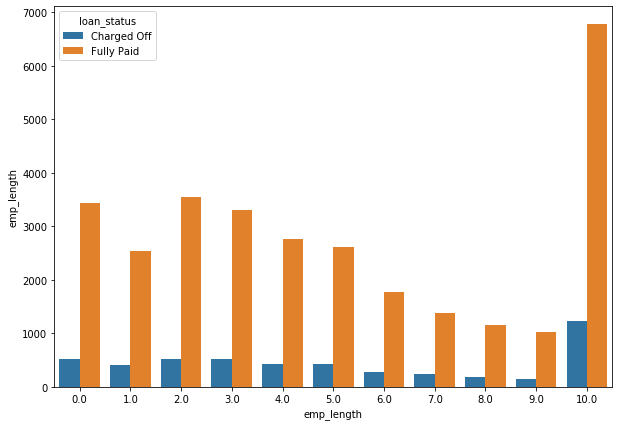

In [52]:
a=df.emp_length.value_counts().sort_index().keys()
b=df.emp_length.value_counts().sort_index().values
sns.barplot(data=df,x=df.emp_length,y=df.emp_length,hue='loan_status',estimator=len)
plt.show()

# Verification

In [53]:
df['verification_status'].value_counts()

Not Verified       14769
Verified           11323
Source Verified     9135
Name: verification_status, dtype: int64

# Delinquency

In [54]:
# Distribution of delinquency across all applicants

df['delinq_2yrs'].value_counts()

0     31415
1      2925
2       608
3       189
4        51
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

# Bivariate Analysis

### loan_status will be the target variable and we will be comparing loan_status acorsss all catogorical variables

In [55]:
# Defining function for bivariate analysis with target variable

def bar_plt(obj):
    sns.barplot(x=obj, y='loan_status', data=df)
    plt.show()

In [56]:
# Finding catogorical variables

object_df = df.select_dtypes(include=['object'])
object_df

,term,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,addr_state
1,60 months,C,C4,Ryder,RENT,Source Verified,car,GA
3,36 months,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,other,CA
5,36 months,A,A4,Veolia Transportaton,RENT,Source Verified,wedding,AZ
6,60 months,C,C5,Southern Star Photography,RENT,Not Verified,debt_consolidation,NC
7,36 months,E,E1,MKC Accounting,RENT,Source Verified,car,CA
...,...,...,...,...,...,...,...,...
39551,36 months,C,C3,Fullmoon Software,RENT,Not Verified,debt_consolidation,VA
39562,36 months,C,C1,E.E. Wine Inc,RENT,Not Verified,debt_consolidation,VA
39623,36 months,D,D3,Maximus,MORTGAGE,Not Verified,debt_consolidation,MD
39666,36 months,C,C4,ARIN,MORTGAGE,Not Verified,debt_consolidation,VA


# Understanding Grade and comparison with Loan Amount based on term

In [57]:
(df['grade'].value_counts(normalize=True)*100).sort_index()

A   25.81
B   30.29
C   20.33
D   13.19
E    7.02
F    2.56
G    0.80
Name: grade, dtype: float64

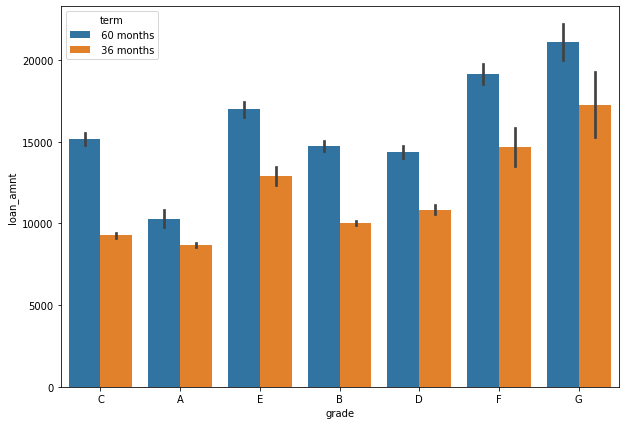

In [58]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

###  Lower Grades are given larger loans - G,F,E grades

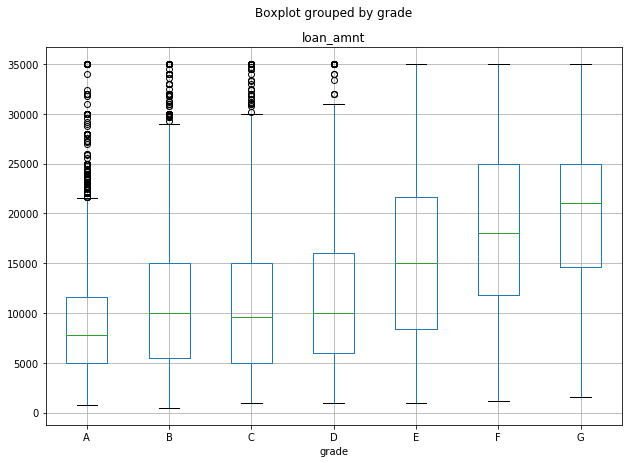

In [59]:
df.boxplot(column='loan_amnt', by='grade')
plt.show()

### The median loan amount for a grade G is higher than that of a grade A, B, or C loan. Almost 1050 more

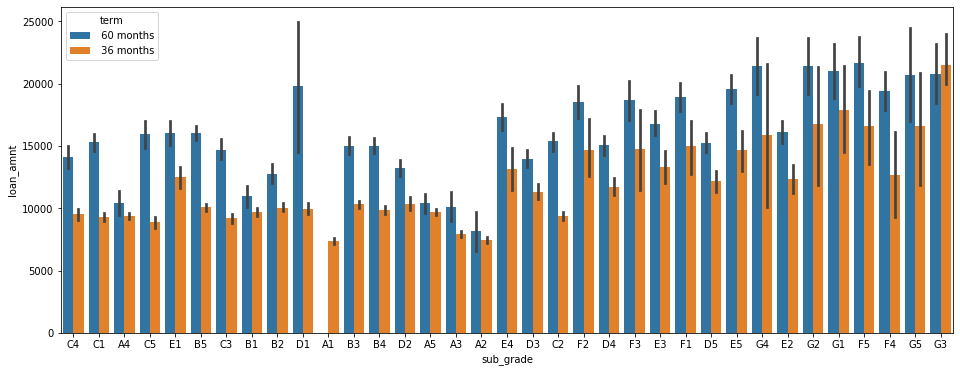

In [60]:
# Comparing Sub Grade 
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

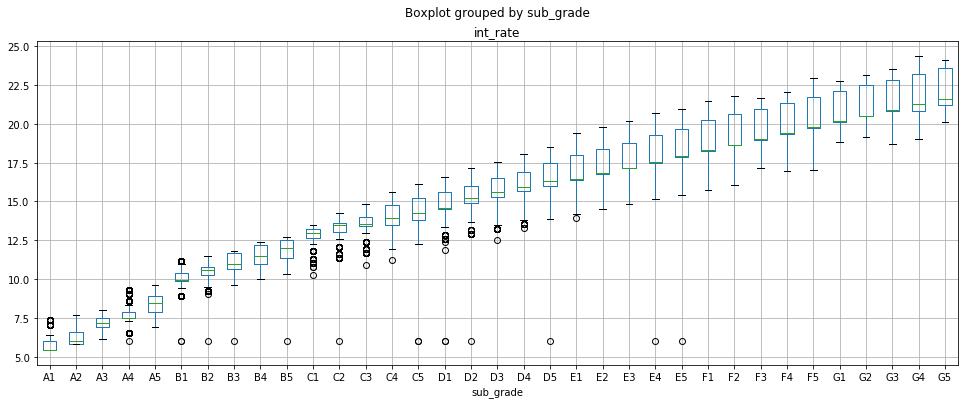

In [61]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(16,6))
plt.show()

### Lower the grades higher the interest rate. This is a deciding factor

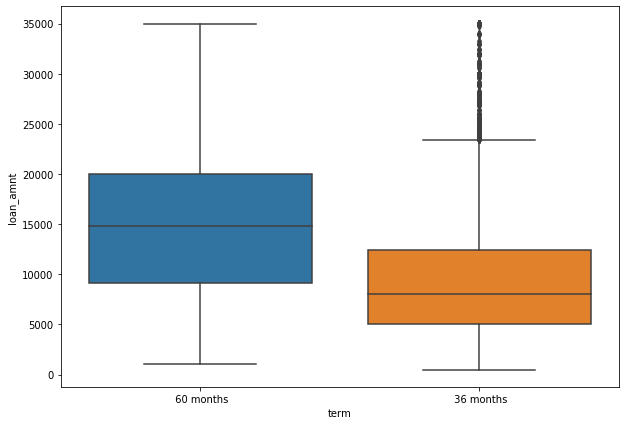

In [62]:
#comparint term
sns.boxplot(x=df.term,y=df.loan_amnt)
plt.show()

Loan amount for high period is high and low for lower period.

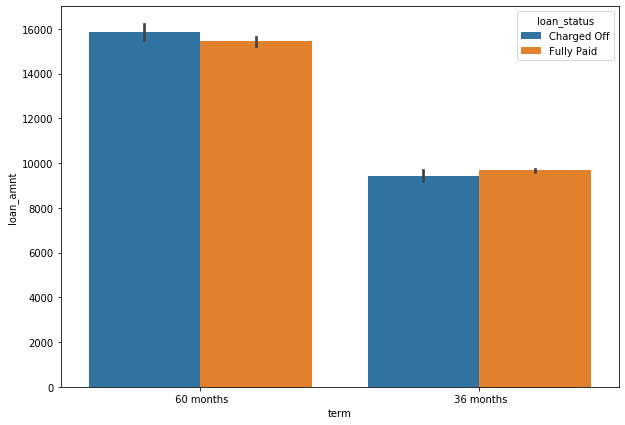

In [63]:
# Comparing term 

sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

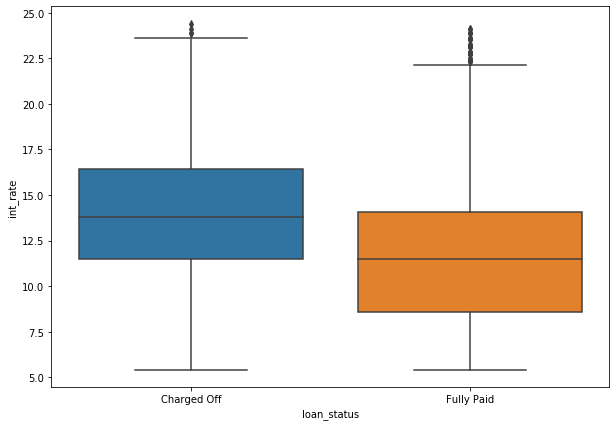

In [64]:
#df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))
sns.boxplot(x=df.loan_status,y=df.int_rate)
plt.show()

Customers who charged off are having high interest rate as compared to others.

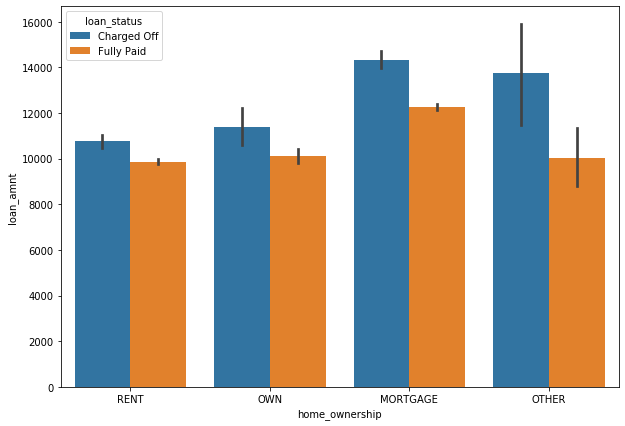

In [65]:
# Comparing home ownership 

sns.barplot(x='home_ownership', y='loan_amnt', hue="loan_status", data=df)
plt.show()

Customers with Mortgage type of home ownership had highest amount of loan

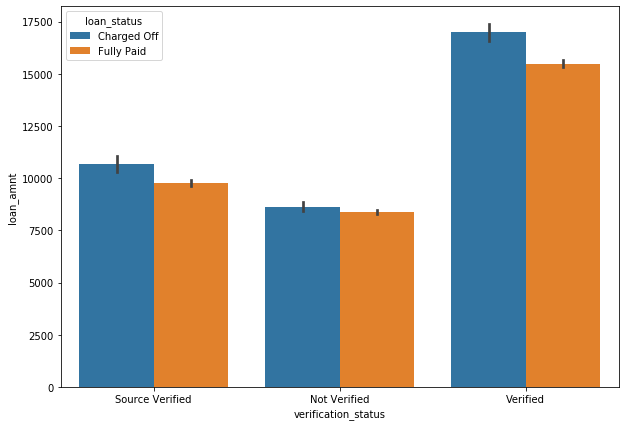

In [66]:
# Comparing verification status

sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

- Higher amount of loans are verifed which is obvious as loan with higher amount is more risky. Likewise less amount of loans are not verified.

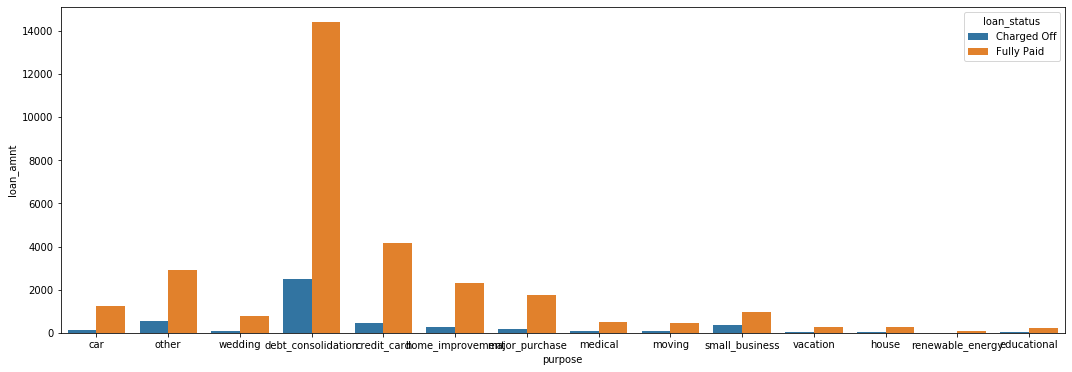

In [67]:
# Comparing Loan Amount with Purpose 

plt.figure(figsize=(18, 6))
sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=df, estimator=len)
plt.show()

  - Higher number of loan has been taken for debt_consolidation
  - Highest amount of loan has been taken for business pupose.

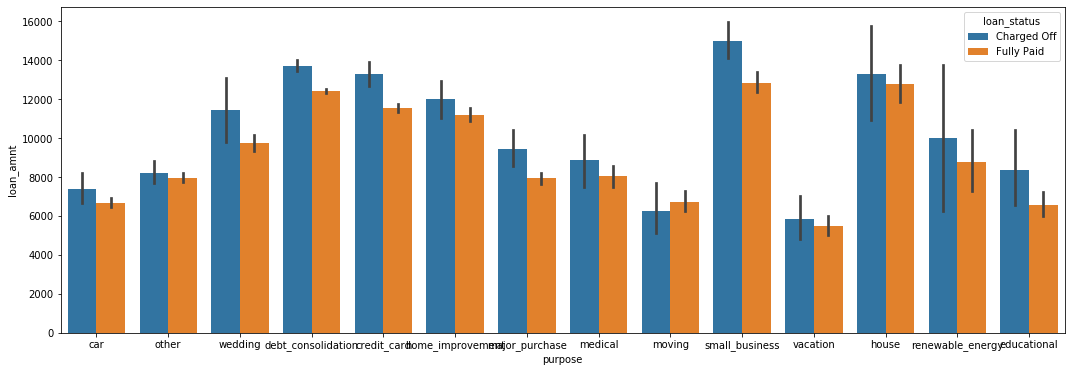

In [68]:
# Comparing Loan Amount with Purpose 

plt.figure(figsize=(18, 6))
sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=df)
plt.show()

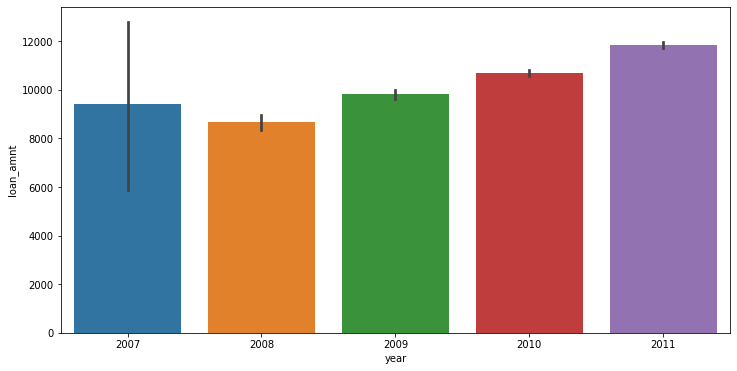

In [69]:
# Comparing Loan Amount with Year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='loan_amnt', data=df, estimator=np.mean)
plt.show()

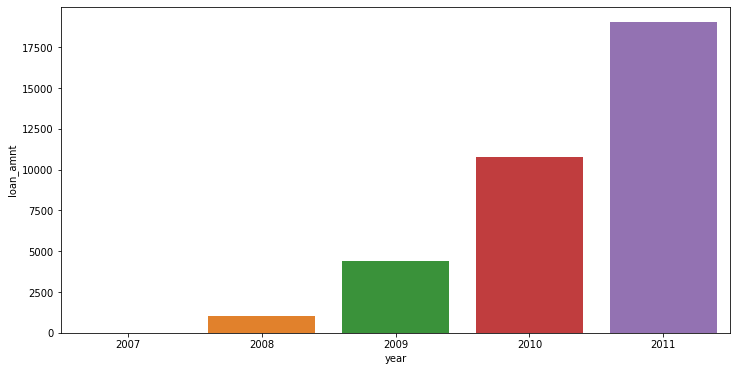

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='loan_amnt', data=df, estimator=len)
plt.show()

- Overall mean loan amount and count of loan issued are increasing over the years.

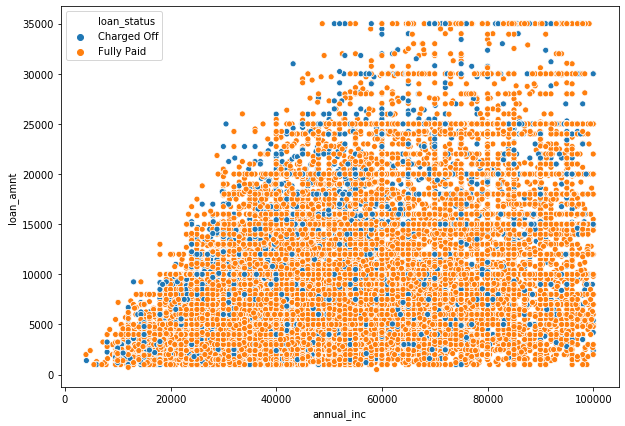

In [71]:
#sns.jointplot('annual_inc','loan_amnt',df.loc[df['annual_inc']<100000])
sns.scatterplot('annual_inc', 'loan_amnt',data=df.loc[df['annual_inc']<100000], hue=df.loan_status)
#sns.scatterplot('annual_inc', 'loan_amnt',data=df, hue=df.loan_status)
plt.show()

### People with annual income less than  100,000 is taking loan up to 35000 which is risky
### In second plot, it is observed that frequency of defaulters is less  who have good salary.

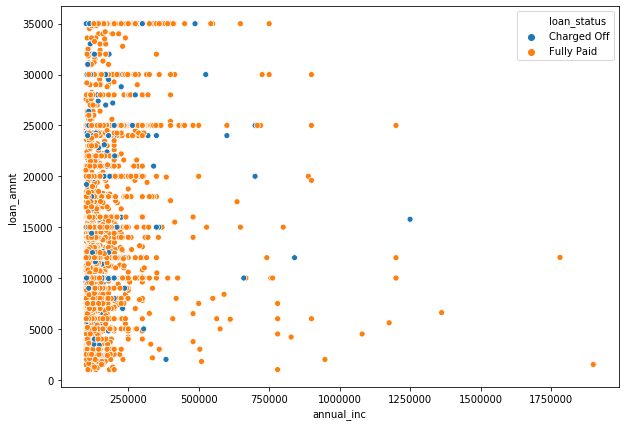

In [72]:
sns.scatterplot('annual_inc', 'loan_amnt', data = df.loc[(df['annual_inc']>100000) & (df['annual_inc']<2000000)],hue=df.loan_status)
plt.show()

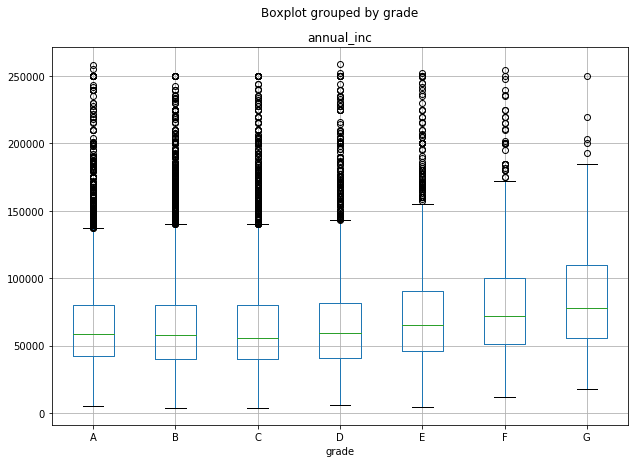

In [73]:
df.loc[df['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

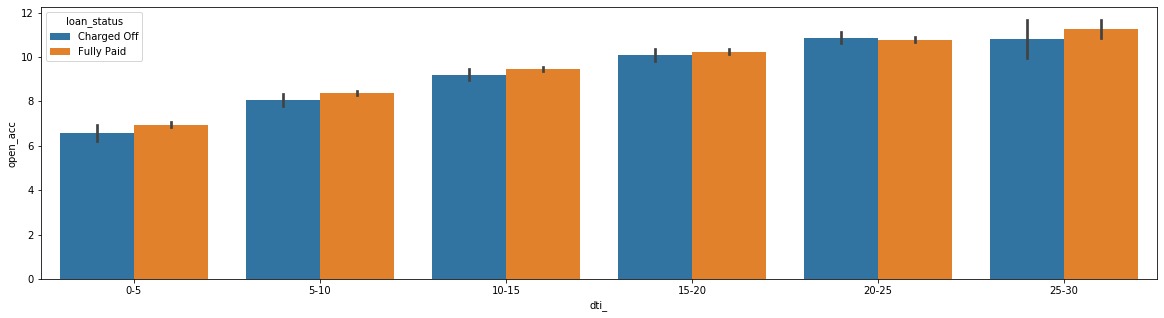

In [74]:
# Comparing DTI with Open Creditline 

plt.figure(figsize=(20,5))
sns.barplot(x='dti_', y='open_acc', hue='loan_status',data=df, estimator=np.mean)
plt.show()

### Dti increses with the number of open account

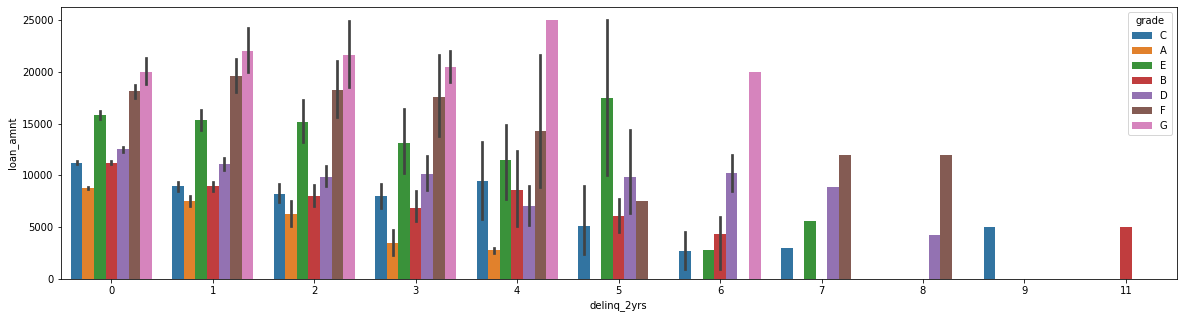

In [75]:
# delinq_2yr VS loan amount VS grade¶

plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=df, estimator=np.mean)
plt.show()

###  People having two or more delinquencies has loan amounts greater than 15000 on average.  

In [76]:
corr=df.corr()
corr['loan_amnt']

loan_amnt                  1.00
funded_amnt                0.98
funded_amnt_inv            0.95
int_rate                   0.30
installment                0.93
emp_length                 0.14
annual_inc                 0.26
dti                        0.06
delinq_2yrs               -0.03
inq_last_6mths             0.01
open_acc                   0.17
pub_rec                   -0.05
revol_bal                  0.32
revol_util                 0.06
total_acc                  0.25
total_pymnt                0.88
total_pymnt_inv            0.86
total_rec_prncp            0.85
total_rec_int              0.73
total_rec_late_fee         0.05
recoveries                 0.14
collection_recovery_fee    0.08
last_pymnt_amnt            0.48
pub_rec_bankruptcies      -0.03
term_months                0.35
year                       0.12
Name: loan_amnt, dtype: float64

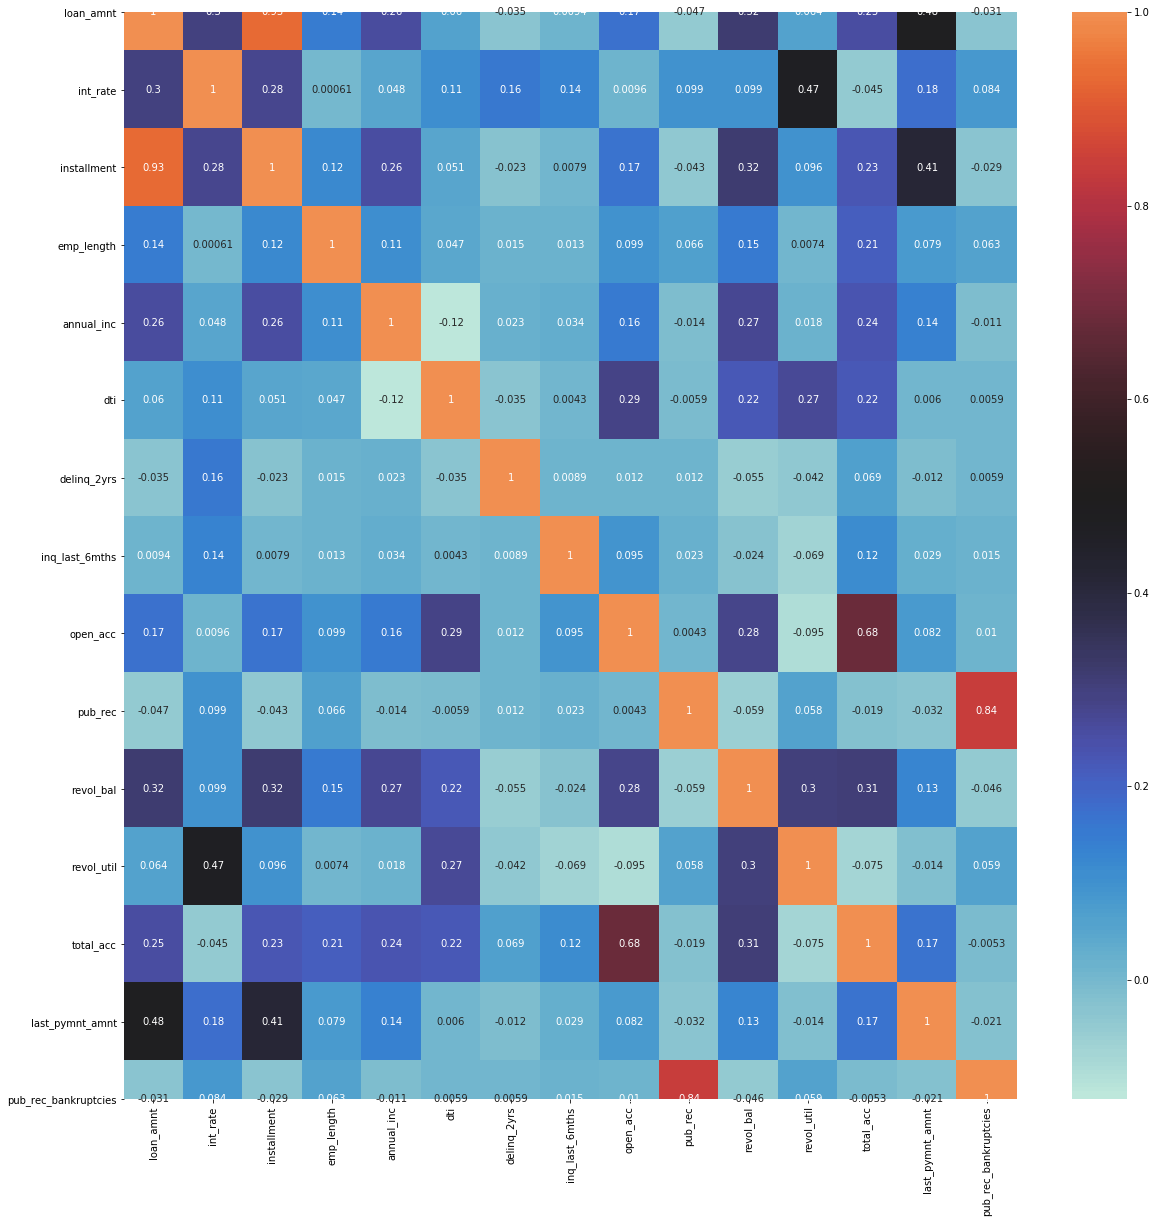

In [77]:
plt.figure(figsize=(20,20))
variables= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[variables].corr()
sns.heatmap(corr, annot=True, center=0.5)

    Loan_amnt is correlated to last_payment_amount -.47
    Interest rate is correlated to revol_util- .47
    delinq_2yrs is non correlated with public record of bankruptcy. 